In [58]:
import pandas as pd
data = pd.read_csv('german_credit_data.csv')

In [59]:
print(data.head())
print(data.info())  
print(data.describe())  

   Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0           0   67    male    2     own             NaN           little   
1           1   22  female    2     own          little         moderate   
2           2   49    male    1     own          little              NaN   
3           3   45    male    2    free          little           little   
4           4   53    male    2    free          little           little   

   Credit amount  Duration              Purpose  Risk  
0           1169         6             radio/TV  good  
1           5951        48             radio/TV   bad  
2           2096        12            education  good  
3           7882        42  furniture/equipment  good  
4           4870        24                  car   bad  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unna

In [60]:
data.drop(columns=['Unnamed: 0'], inplace=True) 

In [61]:
data.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [62]:
data['Saving accounts'].fillna('No Account', inplace=True)
data['Checking account'].fillna('No Account', inplace=True)

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

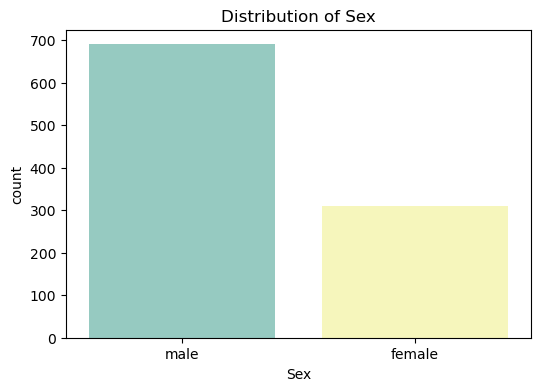

In [64]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', data=data, palette='Set3')
plt.title('Distribution of Sex')
plt.show()

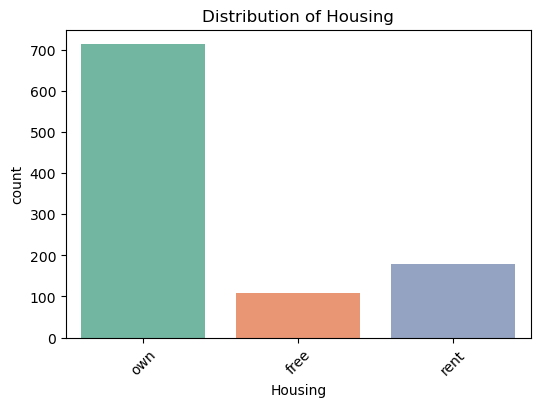

In [65]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Housing', data=data, palette='Set2')
plt.title('Distribution of Housing')
plt.xticks(rotation=45)
plt.show()

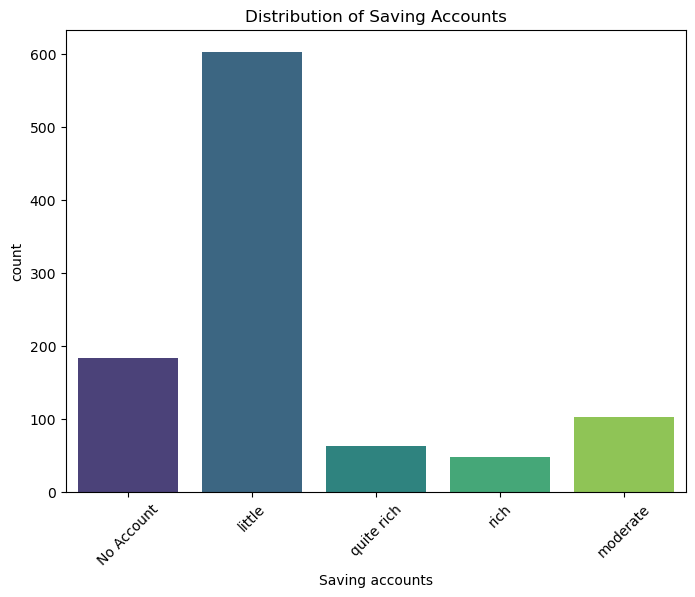

In [66]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Saving accounts', data=data, palette='viridis')
plt.title('Distribution of Saving Accounts')
plt.xticks(rotation=45) 
plt.show()

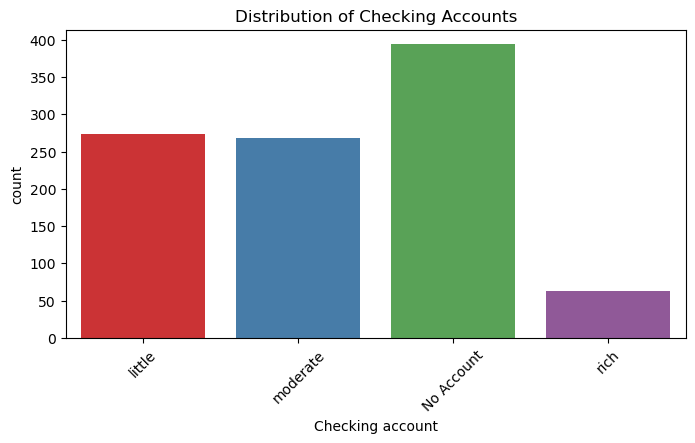

In [67]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Checking account', data=data, palette='Set1')
plt.title('Distribution of Checking Accounts')
plt.xticks(rotation=45)
plt.show()

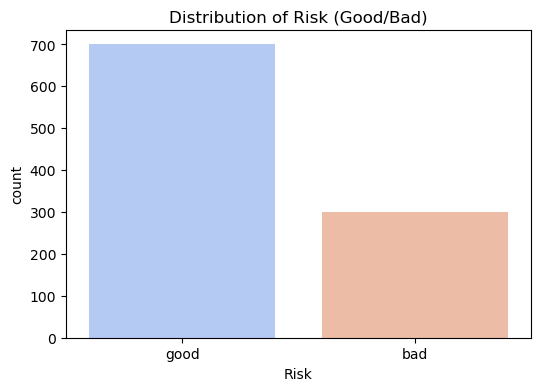

In [68]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Risk', data=data, palette='coolwarm')
plt.title('Distribution of Risk (Good/Bad)')
plt.show()

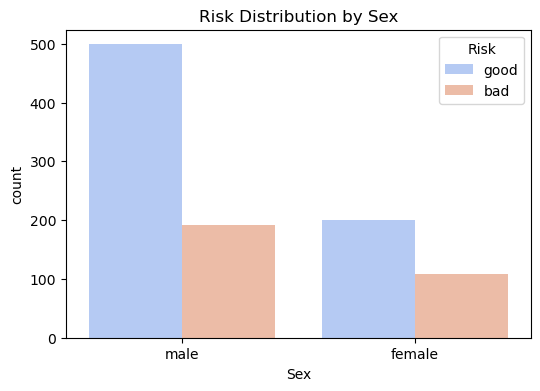

In [69]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='Risk', data=data, palette='coolwarm')
plt.title('Risk Distribution by Sex')
plt.show()

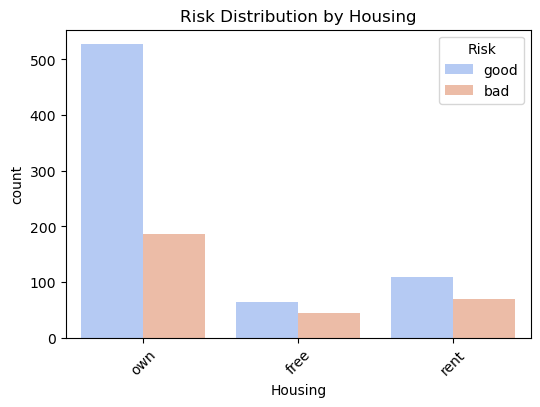

In [70]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Housing', hue='Risk', data=data, palette='coolwarm')
plt.title('Risk Distribution by Housing')
plt.xticks(rotation=45)
plt.show()

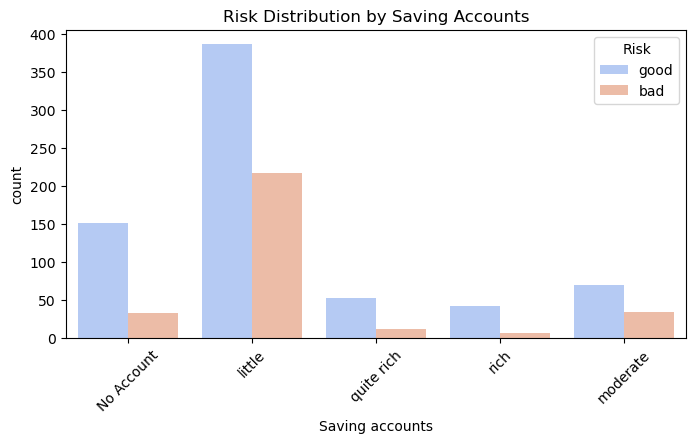

In [71]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Saving accounts', hue='Risk', data=data, palette='coolwarm')
plt.title('Risk Distribution by Saving Accounts')
plt.xticks(rotation=45)
plt.show()

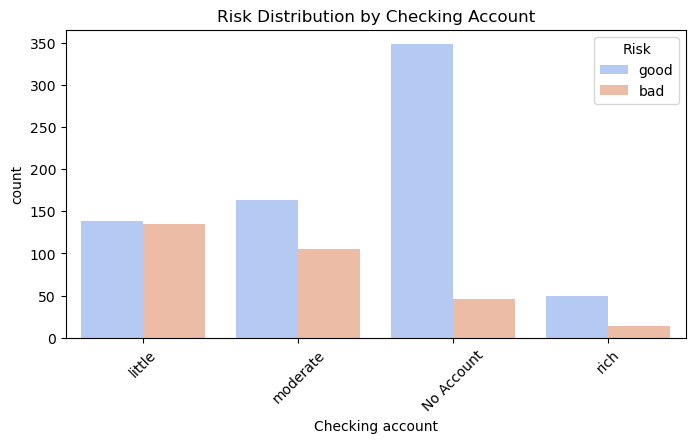

In [72]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Checking account', hue='Risk', data=data, palette='coolwarm')
plt.title('Risk Distribution by Checking Account')
plt.xticks(rotation=45)
plt.show()

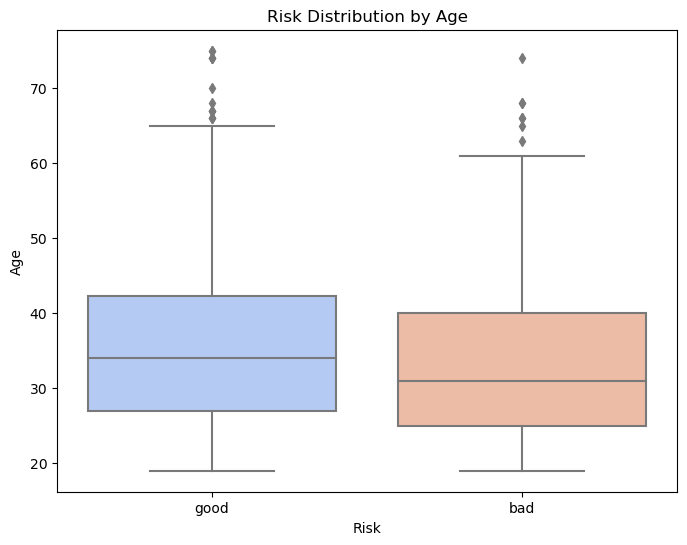

In [73]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Risk', y='Age', data=data, palette='coolwarm')
plt.title('Risk Distribution by Age')
plt.show()

C:\Users\aicha\AppData\Local\Temp\ipykernel_42288\1202468545.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(x='Risk', y='Age', data=data, palette='coolwarm')
c:\Users\aicha\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\aicha\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


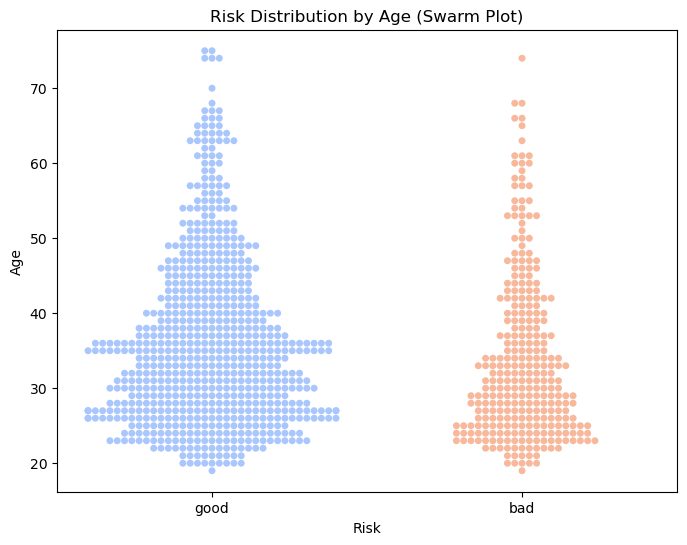

In [74]:
plt.figure(figsize=(8, 6))
sns.swarmplot(x='Risk', y='Age', data=data, palette='coolwarm')
plt.title('Risk Distribution by Age (Swarm Plot)')
plt.show()

In [75]:
import numpy as np

data['Saving accounts'].replace('No Account', np.nan, inplace=True)
data['Checking account'].replace('No Account', np.nan, inplace=True)

In [76]:
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [77]:
bins = [18, 30, 40, 50, 60, 70, 100]
labels = ['18-30', '31-40', '41-50', '51-60', '61-70', '70+']
data['Age_group'] = pd.cut(data['Age'], bins=bins, labels=labels)

saving_mode = data.groupby(['Risk', 'Housing', 'Age_group'])['Saving accounts'].apply(lambda x: x.mode()[0] if not x.mode().empty else None)
checking_mode = data.groupby(['Risk', 'Housing', 'Age_group'])['Checking account'].apply(lambda x: x.mode()[0] if not x.mode().empty else None)

print(saving_mode)
print(checking_mode)

Risk  Housing  Age_group
bad   free     18-30          little
               31-40          little
               41-50          little
               51-60          little
               61-70          little
               70+            little
      own      18-30          little
               31-40          little
               41-50          little
               51-60          little
               61-70          little
               70+               NaN
      rent     18-30          little
               31-40          little
               41-50          little
               51-60          little
               61-70        moderate
               70+               NaN
good  free     18-30          little
               31-40          little
               41-50          little
               51-60          little
               61-70          little
               70+            little
      own      18-30          little
               31-40          little
             

C:\Users\aicha\AppData\Local\Temp\ipykernel_42288\16853584.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  saving_mode = data.groupby(['Risk', 'Housing', 'Age_group'])['Saving accounts'].apply(lambda x: x.mode()[0] if not x.mode().empty else None)
C:\Users\aicha\AppData\Local\Temp\ipykernel_42288\16853584.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  checking_mode = data.groupby(['Risk', 'Housing', 'Age_group'])['Checking account'].apply(lambda x: x.mode()[0] if not x.mode().empty else None)


In [78]:
for index, row in data.iterrows():
    if pd.isnull(row['Saving accounts']):
        mode_value = saving_mode.get((row['Risk'], row['Housing'], row['Age_group']), 'moderate')
        data.at[index, 'Saving accounts'] = mode_value

for index, row in data.iterrows():
    if pd.isnull(row['Checking account']):
        mode_value = checking_mode.get((row['Risk'], row['Housing'], row['Age_group']), 'little')
        data.at[index, 'Checking account'] = mode_value

In [79]:
print(data[['Saving accounts', 'Checking account']].isnull().sum())

Saving accounts     0
Checking account    0
dtype: int64


In [80]:
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Age_group
0,67,male,2,own,little,little,1169,6,radio/TV,good,61-70
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,18-30
2,49,male,1,own,little,moderate,2096,12,education,good,41-50
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,41-50
4,53,male,2,free,little,little,4870,24,car,bad,51-60


In [81]:
variable_types = data.dtypes

categorical_vars = data.select_dtypes(include=['object']).columns
unique_values = {col: data[col].unique() for col in categorical_vars}

print("Variable Types:")
print(variable_types)
print("\nUnique Values in Categorical Variables:")
for col, values in unique_values.items():
    print(f"{col}: {values}")

Variable Types:
Age                    int64
Sex                   object
Job                    int64
Housing               object
Saving accounts       object
Checking account      object
Credit amount          int64
Duration               int64
Purpose               object
Risk                  object
Age_group           category
dtype: object

Unique Values in Categorical Variables:
Sex: ['male' 'female']
Housing: ['own' 'free' 'rent']
Saving accounts: ['little' 'quite rich' 'rich' 'moderate']
Checking account: ['little' 'moderate' 'rich']
Purpose: ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']
Risk: ['good' 'bad']


In [88]:
# Label Encoding
# Sex: male = 0, female = 1
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

# Housing: rent = 0, free = 1, own = 2
data['Housing'] = data['Housing'].map({'rent': 0, 'free': 1, 'own': 2})

# Saving accounts: little = 0, moderate = 1, quite rich = 2, rich = 3
data['Saving accounts'] = data['Saving accounts'].map({'little': 0, 'moderate': 1, 'quite rich': 2, 'rich': 3})

# Checking account: little = 0, moderate = 1, rich = 2
data['Checking account'] = data['Checking account'].map({'little': 0, 'moderate': 1, 'rich': 2})

# Purpose: Assigning values (0 for least expensive upwards)
purpose_mapping = {
    'radio/TV': 0, 
    'education': 5, 
    'furniture/equipment': 1, 
    'car': 6, 
    'business': 7, 
    'domestic appliances': 2, 
    'repairs': 3, 
    'vacation/others': 4
}
data['Purpose'] = data['Purpose'].map(purpose_mapping)

# Risk: good = 1, bad = 0
data['Risk'] = data['Risk'].map({'good': 1, 'bad': 0})

print("\nEncoded DataFrame with Label Encoding:")
print(data.head()) 


Encoded DataFrame with Label Encoding:
   Age  Sex  Job  Housing  Saving accounts  Checking account  Credit amount  \
0   67  NaN    2      NaN              NaN               NaN           1169   
1   22  NaN    2      NaN              NaN               NaN           5951   
2   49  NaN    1      NaN              NaN               NaN           2096   
3   45  NaN    2      NaN              NaN               NaN           7882   
4   53  NaN    2      NaN              NaN               NaN           4870   

   Duration  Purpose  Risk  
0         6      NaN   NaN  
1        48      NaN   NaN  
2        12      NaN   NaN  
3        42      NaN   NaN  
4        24      NaN   NaN  


Explanation of Encoding

Sex: male = 0 , female = 1

Housing: rent = 0 , free = 1 , own = 2 

Saving accounts: , little = 0 , moderate = 1 , quite rich = 2 , rich = 3

Checking account: little = 0 , moderate = 1 , rich = 2

Purpose: Assigned values are based on the order of expense (from least to most expensive):

radio/TV: 0 , furniture/equipment: 1 , domestic appliances: 2 , repairs: 3 , vacation/others: 4 , education: 5 , car: 6 , business: 7
     
Risk: good = 1 , bad = 0